In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


In [ ]:
import os 
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_schema.csv', 'README.txt', 'survey_results_public.csv']

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd # Data Related operation
import numpy as np  # used for numeric operation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sodata= pd.read_csv("/content/stackoverflow-developer-survey-2020/survey_results_public.csv")


In [ ]:
schema=pd.read_csv('/content/stackoverflow-developer-survey-2020/survey_results_schema.csv', index_col="Column")

In [ ]:
sodata.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [ ]:
schema

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [ ]:
sodata.shape

(64461, 61)

In [ ]:
sodata.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [ ]:
display(sodata.dtypes.value_counts().to_frame('Count').T)
sodata.dtypes

,object,float64,int64
Count,56,4,1


Respondent              int64
MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object

#### Data Preparation (Preprocessing Starts From Here)
* Demographic Survey respondents and global programming community

* Distribution of Programming Skills, Experiance related information,preferances and Opinions


In [ ]:
selected_columns = [
                    # Demographics Columns
                    'Country',
                    'Age',
                    'Gender',
                    'EdLevel',
                    'UndergradMajor',
                    # Programming Experience
                    'Hobbyist',
                    'Age1stCode',
                    'YearsCode',
                    'YearsCodePro',
                    'LanguageWorkedWith',
                    'LanguageDesireNextYear',
                    'NEWLearn',
                    'NEWStuck',
                    # Employment
                    'Employment',
                    'DevType',
                    'WorkWeekHrs',
                    'JobSat',
                    'JobFactors',
                    'NEWOvertime',
                    'NEWEdImpt'
                    ]

In [ ]:
len(selected_columns)

20

In [ ]:
survey=sodata[selected_columns].copy(deep=True)
survey

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
survey.shape

(64461, 20)

In [ ]:
#Information About Survey DataSet

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [ ]:
(survey.isnull().sum()/len(survey))*100

Country                    0.603466
Age                       29.498456
Gender                    21.569631
EdLevel                   10.905819
UndergradMajor            20.890151
Hobbyist                   0.069810
Age1stCode                10.178247
YearsCode                 10.513334
YearsCodePro              28.097609
LanguageWorkedWith        10.988039
LanguageDesireNextYear    16.053117
NEWLearn                  12.883759
NEWStuck                  14.703464
Employment                 0.941655
DevType                   23.411055
WorkWeekHrs               36.161400
JobSat                    29.889390
JobFactors                23.443633
NEWOvertime               32.934643
NEWEdImpt                 24.815004
dtype: float64

In [ ]:
survey["Age1stCode"]=pd.to_numeric(survey["Age1stCode"], errors='coerce')
survey["YearsCodePro "]=pd.to_numeric(survey["YearsCodePro"], errors='coerce')
survey["YearsCode   "]=pd.to_numeric(survey["YearsCodePro"], errors='coerce')


In [ ]:
survey.select_dtypes('float64').describe()

,Age,Age1stCode,WorkWeekHrs,YearsCodePro,YearsCode
count,45446.000000,57473.000000,41151.000000,44133.000000,44133.000000
mean,30.834111,15.476572,40.782174,8.869667,8.869667
std,9.585392,5.114081,17.816383,7.759961,7.759961
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,40.000000,3.000000,3.000000
50%,29.000000,15.000000,40.000000,6.000000,6.000000
75%,35.000000,18.000000,44.000000,12.000000,12.000000
max,279.000000,85.000000,475.000000,50.000000,50.000000


In [ ]:
# Drop the Rows Which Contains The Age Greater than 100 And Less than 10
survey[(survey["Age"]>10 ) & (survey["Age"] <=100)].shape[0]

45431

In [ ]:
survey[(survey["Age"]>10 ) & (survey["Age"] <=100)]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,YearsCodePro,YearsCode
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,4.0,4.0
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,8.0,8.0
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17,13,Python;SQL,JavaScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,13.0,13.0
8,Tunisia,30.0,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",No,20.0,6,4,HTML/CSS;JavaScript;PHP,Python;Rust,Once a year,Meditate,"Independent contractor, freelancer, or self-em...","Developer, full-stack",50.0,Very dissatisfied,Diversity of the company or organization;Remot...,Occasionally: 1-2 days per quarter but less th...,Very important,4.0,4.0
9,United Kingdom,22.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,14.0,8,4,HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;Java;JavaScript;Python;R;SQL,Every few months,Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;D...",36.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Fairly important,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64426,Spain,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,10,NaN,Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Pytho...,Assembly;C;C++;Go;Java;Kotlin;Python;Rust;Type...,Once a year,Play games;Visit Stack Overflow;Watch help / t...,Student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64427,Brazil,34.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,16,14,Python;SQL,Python;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,14.0,14.0
64430,Israel,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Yes,35.0,3,NaN,HTML/CSS;JavaScript;Python,Haskell;HTML/CSS;JavaScript;Python;Rust,Every few months,Meditate;Play games;Call a coworker or friend;...,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,Fairly important,NaN,NaN
64433,France,64.0,Man,NaN,"Information systems, information technology, o...",Yes,18.0,30,NaN,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl...,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Retired,NaN,NaN,NaN,NaN,NaN,Fairly important,NaN,NaN


In [ ]:
survey.query('Age>100').shape[0]

1

In [ ]:
print(survey.shape[0])
survey.drop(survey[survey["Age"]<10].index,inplace=True)

64461


In [ ]:
print(survey.shape[0])
survey.drop(survey[survey["Age"]>100].index,inplace=True)
print(survey.shape[0])

64452
64451


In [ ]:
survey["WorkWeekHrs"].max()


475.0

In [ ]:
survey.drop(survey[survey["WorkWeekHrs"]>140].index,inplace=True)
print(survey.shape[0])

64306


In [ ]:
survey.shape

(64306, 22)

In [ ]:
survey["Gender"].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [ ]:
survey.where(~(survey["Gender"].str.contains(';',na=False)),np.nan,inplace=True)

In [ ]:
survey["Gender"].value_counts(dropna=False)

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [ ]:
survey.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,YearsCodePro,YearsCode
63590,Colombia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47091,United Kingdom,63.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,19.0,44,37,JavaScript;SQL,NaN,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...",Data or business analyst;Database administrato...,48.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Not at all important/not necessary,37.0,37.0
6861,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,20,14,Go;JavaScript;TypeScript,NaN,Once every few years,Play games;Go for a walk or other physical act...,Employed full-time,"Developer, front-end;Developer, full-stack;Dev...",38.0,Very satisfied,Flex time or a flexible schedule;Specific depa...,Never,Fairly important,14.0,14.0
34685,Australia,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,8,4,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;R...,Every few months,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",60.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,4.0,4.0
38655,Ukraine,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,C;C#;C++;Python;SQL;VBA,Java;JavaScript;Objective-C,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11160,Finland,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Fine arts or performing arts (such as graphic ...,Yes,23.0,7,NaN,HTML/CSS;JavaScript;Python;Scala;SQL,C;C#;C++;Go;HTML/CSS;JavaScript;Python;Scala;SQL,Once a year,Meditate;Visit Stack Overflow;Go for a walk or...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Office enviro...,NaN,NaN,NaN,NaN
8231,India,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,12.0,10,5,JavaScript;PHP,Dart;HTML/CSS;JavaScript;PHP;TypeScript,Every few months,Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Designer;Developer, back-end;Developer, deskto...",7.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important,5.0,5.0
6910,India,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18.0,7,2,Go;JavaScript,Go;JavaScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",45.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Fairly important,2.0,2.0
31801,France,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,17.0,7,4,Scala;SQL,Haskell;Scala;SQL,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Database administrator;Developer, back-end",38.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Rarely: 1-2 days per year or less,Very important,4.0,4.0
45171,Serbia,45.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,11.0,34,20,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;Go;JavaScript;TypeScript,Once a year,Visit Stack Overflow,Employed full-time,"Developer, desktop or enterprise applications;...",9.0,Slightly

### Exploration Data Analysis

In [ ]:
help(sns.set_style)

Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the aesthetic style of the plots.
    
    This affects things like the color of the axes, whether a grid is
    enabled by default, and other aesthetic elements.
    
    Parameters
    ----------
    style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured set.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    >>> set_style("whitegrid")
    
    >>> set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    See Also
    --------
    axes_style : return a dict of parameters or use in a ``with`` statement
                 to temporarily set the style.
    set_context : set parameters to scale plot elements


In [ ]:
survey.Country.nunique

<bound method IndexOpsMixin.nunique of 0                   Germany
1            United Kingdom
2        Russian Federation
3                   Albania
4             United States
                ...        
64456         United States
64457               Morocco
64458              Viet Nam
64459                Poland
64460                 Spain
Name: Country, Length: 64306, dtype: object>

In [ ]:
import matplotlib
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']="#00000000"


### Country Analysis

In [ ]:
top_countries=survey["Country"].value_counts().head(15)
top_countries


United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

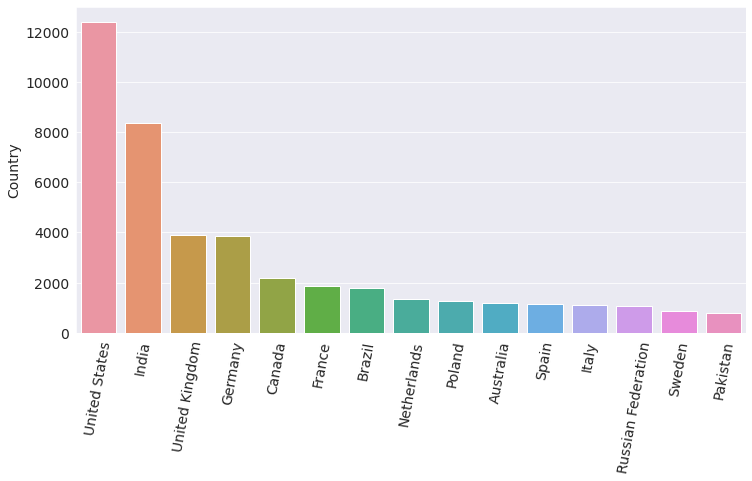

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index,y=top_countries)
plt.xticks(rotation=80)

plt.show()

In [ ]:
lowest_countries=survey["Country"].value_counts().tail(15)
lowest_countries


Solomon Islands                       2
Antigua and Barbuda                   1
Nauru                                 1
Kiribati                              1
Marshall Islands                      1
Mali                                  1
Liechtenstein                         1
Fiji                                  1
Lesotho                               1
Chad                                  1
Gabon                                 1
Grenada                               1
North Korea                           1
Saint Lucia                           1
Micronesia, Federated States of...    1
Name: Country, dtype: int64

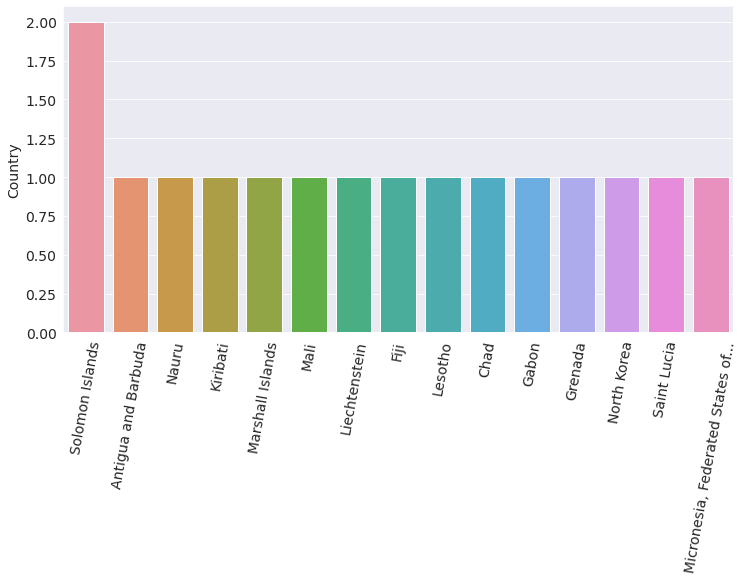

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=lowest_countries.index,y=lowest_countries)
plt.xticks(rotation=80)

plt.show()

### Age

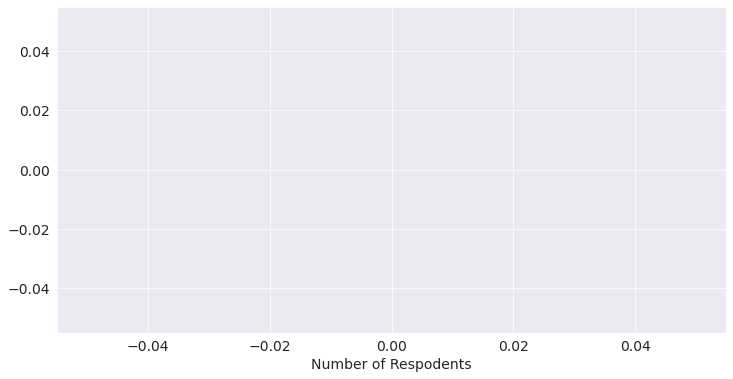

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(survey["Age"], bins=np.arange(10,18,8), color="red")
plt.xlabel("Age")
plt.xlabel("Number of Respodents")
plt.show()

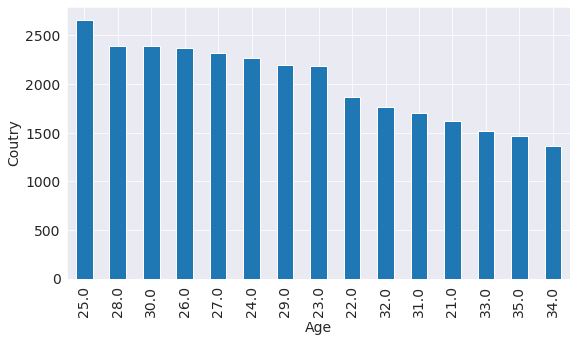

In [ ]:
survey["Age"].value_counts().head(15).plot(kind="bar",xlabel="Age",ylabel="Coutry")
plt.show()

## Gender

In [ ]:
survey.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64